# Challenge question
What brain activity patterns associated with ADHD and are there differences between males and female?
# Deliverable
A multi outcome model to predict both sex and ADHD diagnosis

In [3]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Loading the data
First we will load the different dataframes found in the training dataset. This includes categorical, quantitative, connectome matrices and the training solutions

# To Train the model
To train the model we will need xtrain dataframe that contains the predictor variables 
Then we will need a ytrain dataframe with the predictor variables like ADHD outcome and Sex. 


In [4]:
trainCategorical = pd.read_excel("TRAIN_CATEGORICAL_METADATA.xlsx")
trainCategorical

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45


In [5]:
#columns
trainCategorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [6]:
#load functional connectome matrices 
trainConnectome = pd.read_csv("TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
trainConnectome


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,kTurROKp5YHQ,0.022932,0.024830,-0.006514,0.021070,0.093365,0.083369,0.010991,0.035838,0.023909,...,0.060060,-0.003911,-0.016413,0.089110,0.118587,-0.060868,0.124443,0.028510,0.113064,0.103809
1209,FCRyMz9O6yCq,0.047078,0.135955,0.144366,0.054938,0.065760,0.113550,0.032621,0.025349,0.011848,...,0.021318,0.020141,-0.020920,0.030450,0.190241,0.026461,-0.011593,0.139483,-0.064480,0.070354
1210,vm2P1hmAY1hl,0.094541,0.145280,0.061964,0.030562,0.078278,0.105857,0.043984,0.039145,0.032024,...,-0.052990,-0.002118,-0.038452,0.066608,0.143446,0.051221,0.127495,0.106242,-0.036065,0.151341
1211,OFxvN8lnw21w,-0.001533,0.128562,0.045000,-0.008742,0.003673,0.086494,0.090101,-0.037449,-0.026334,...,0.024479,-0.036995,-0.061617,-0.001699,0.106568,0.023427,-0.003520,0.174972,0.041198,0.152029


In [7]:
#columns
trainConnectome.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [8]:
#load quantitative data
trainQuant = pd.read_excel("TRAIN_QUANTITATIVE_METADATA.xlsx")
trainQuant

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,NaN
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094


In [9]:
#columns
trainQuant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [10]:
#load training solutions
trainSol = pd.read_excel("TRAINING_SOLUTIONS.xlsx")
trainSol

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


# Exploratory Data Analysis 
To detect underlying relationships and any highlight any missing data or outliers 

Can easily visualize the data and understand the spread

**Overview of Insights**

This is an imbalanced dataset. There are more males than females and a higher distribution of ADHD outcomes. 
The data is also unbalanced since it features larger counts of high income and high educated parents. 
The data also is primarily made of children 

*Prior to training the model, I will need to account for these imbalances*

In [11]:
trainCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


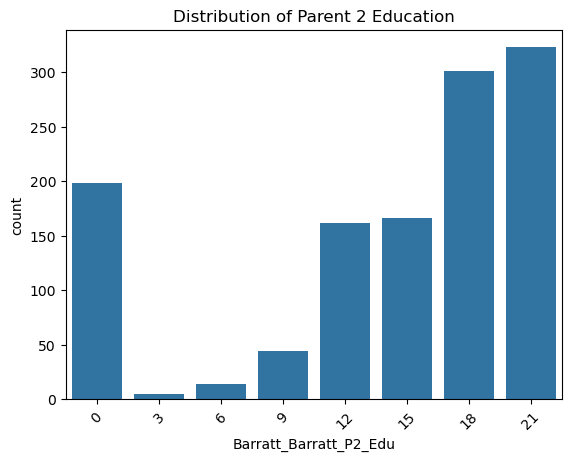

In [12]:
trainCategorical['Barratt_Barratt_P2_Edu'].value_counts()
#visualize 
sns.countplot(x='Barratt_Barratt_P2_Edu', data=trainCategorical[['Barratt_Barratt_P2_Edu']])
plt.title(f"Distribution of Parent 2 Education")
plt.xticks(rotation=45)
plt.show()

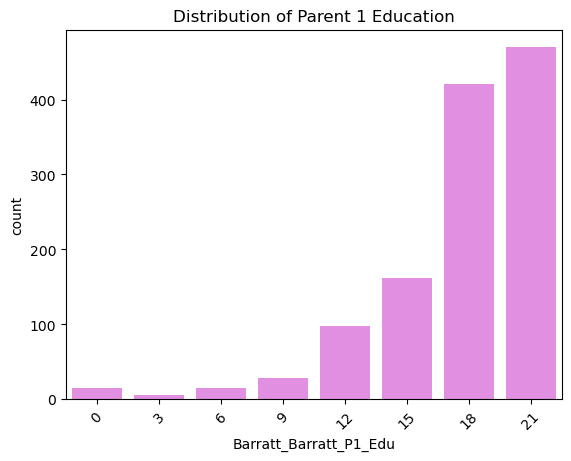

In [13]:
trainCategorical['Barratt_Barratt_P1_Edu'].value_counts()
sns.countplot(x='Barratt_Barratt_P1_Edu', data=trainCategorical[['Barratt_Barratt_P1_Edu']],color='violet')
plt.title(f"Distribution of Parent 1 Education")
plt.xticks(rotation=45)
plt.show()

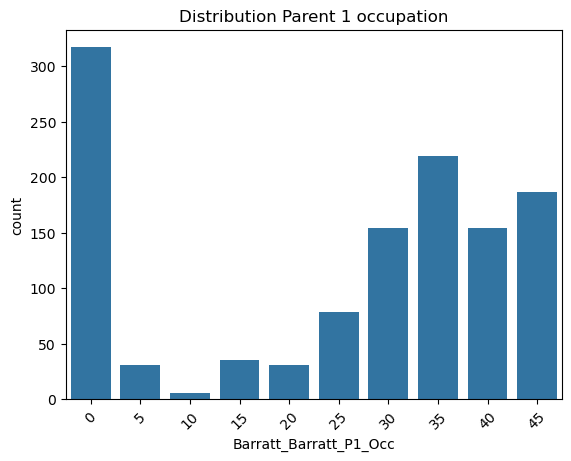

In [14]:
trainCategorical['Barratt_Barratt_P1_Occ'].value_counts()
sns.countplot(x='Barratt_Barratt_P1_Occ', data=trainCategorical[['Barratt_Barratt_P1_Occ']])
plt.title(f"Distribution Parent 1 occupation")
plt.xticks(rotation=45)
plt.show()

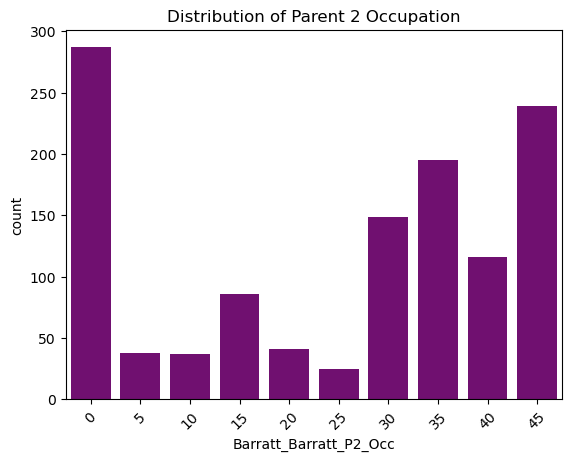

In [15]:
trainCategorical['Barratt_Barratt_P2_Occ'].value_counts()
sns.countplot(x='Barratt_Barratt_P2_Occ', data=trainCategorical[['Barratt_Barratt_P2_Occ']],color = 'purple')
plt.title(f"Distribution of Parent 2 Occupation")
plt.xticks(rotation=45)
plt.show()

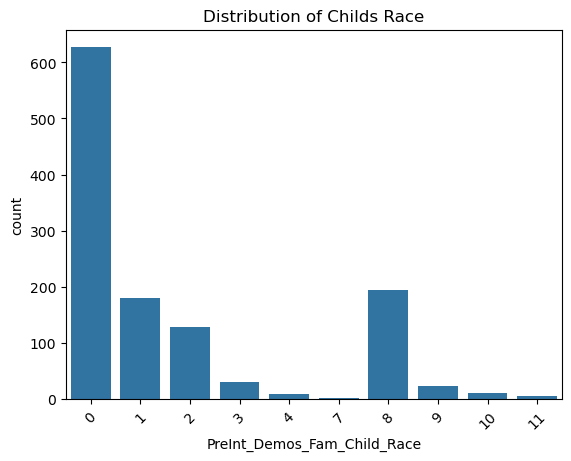

In [16]:
trainCategorical['PreInt_Demos_Fam_Child_Race'].value_counts()
sns.countplot(x='PreInt_Demos_Fam_Child_Race', data=trainCategorical[['PreInt_Demos_Fam_Child_Race']])
plt.title(f"Distribution of Childs Race")
plt.xticks(rotation=45)
plt.show()

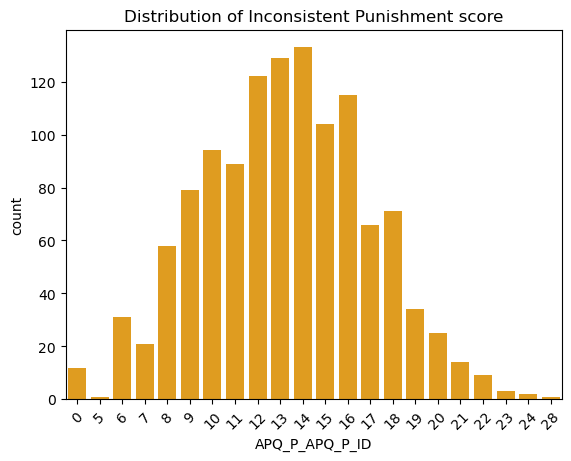

In [17]:
trainQuant['APQ_P_APQ_P_ID'].value_counts()
sns.countplot(x='APQ_P_APQ_P_ID', data=trainQuant[['APQ_P_APQ_P_ID']],color = 'orange')
plt.title(f"Distribution of Inconsistent Punishment score")
plt.xticks(rotation=45)
plt.show()

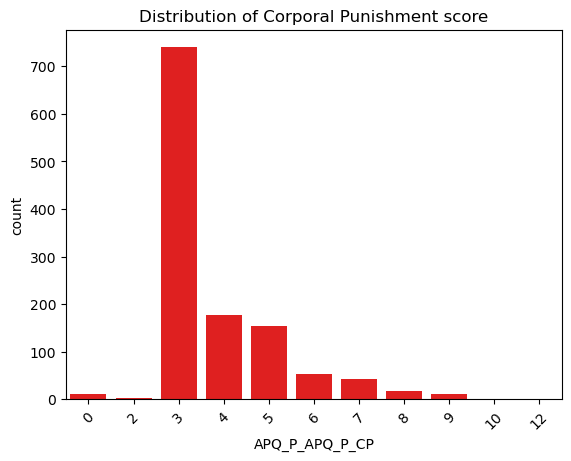

In [18]:
trainQuant['APQ_P_APQ_P_CP'].value_counts()
sns.countplot(x='APQ_P_APQ_P_CP', data=trainQuant[['APQ_P_APQ_P_CP']],color = 'red')
plt.title(f"Distribution of Corporal Punishment score")
plt.xticks(rotation=45)
plt.show()

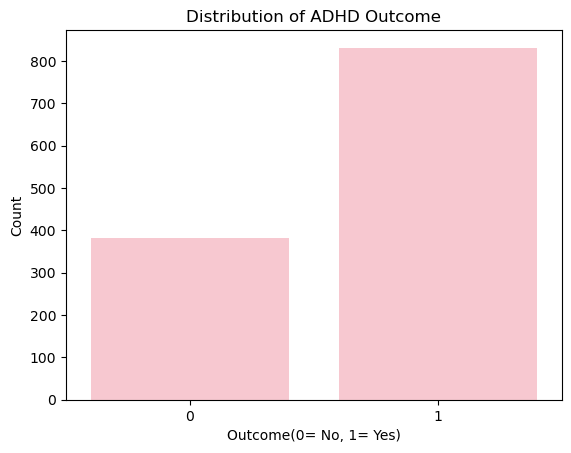

In [19]:
#ADHD Distribution 
trainSol['ADHD_Outcome'].value_counts()

sns.countplot(x='ADHD_Outcome', data=trainSol[['ADHD_Outcome']], color = 'pink')
plt.title(f"Distribution of ADHD Outcome")
plt.xlabel('Outcome(0= No, 1= Yes)')
plt.ylabel('Count')
plt.show()


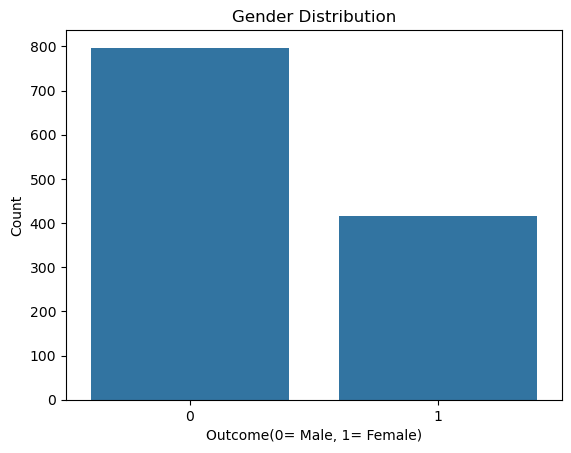

In [20]:
#Sex Distribution 
trainSol['Sex_F'].value_counts()

sns.countplot(x='Sex_F', data=trainSol[['Sex_F']])
plt.title(f"Gender Distribution")
plt.xlabel('Outcome(0= Male, 1= Female)')
plt.ylabel('Count')
plt.show()

In [21]:
#Functional Connectivity 
#The connectivity looks at the correlation between different brain regions, which could help highlight relationships between the different areas. 
trainConnectome 


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,kTurROKp5YHQ,0.022932,0.024830,-0.006514,0.021070,0.093365,0.083369,0.010991,0.035838,0.023909,...,0.060060,-0.003911,-0.016413,0.089110,0.118587,-0.060868,0.124443,0.028510,0.113064,0.103809
1209,FCRyMz9O6yCq,0.047078,0.135955,0.144366,0.054938,0.065760,0.113550,0.032621,0.025349,0.011848,...,0.021318,0.020141,-0.020920,0.030450,0.190241,0.026461,-0.011593,0.139483,-0.064480,0.070354
1210,vm2P1hmAY1hl,0.094541,0.145280,0.061964,0.030562,0.078278,0.105857,0.043984,0.039145,0.032024,...,-0.052990,-0.002118,-0.038452,0.066608,0.143446,0.051221,0.127495,0.106242,-0.036065,0.151341
1211,OFxvN8lnw21w,-0.001533,0.128562,0.045000,-0.008742,0.003673,0.086494,0.090101,-0.037449,-0.026334,...,0.024479,-0.036995,-0.061617,-0.001699,0.106568,0.023427,-0.003520,0.174972,0.041198,0.152029


In [22]:
#Which variables are most predictive for target variables 
#Are there correlations worth exploring further
#What insights can be drawn for modeling

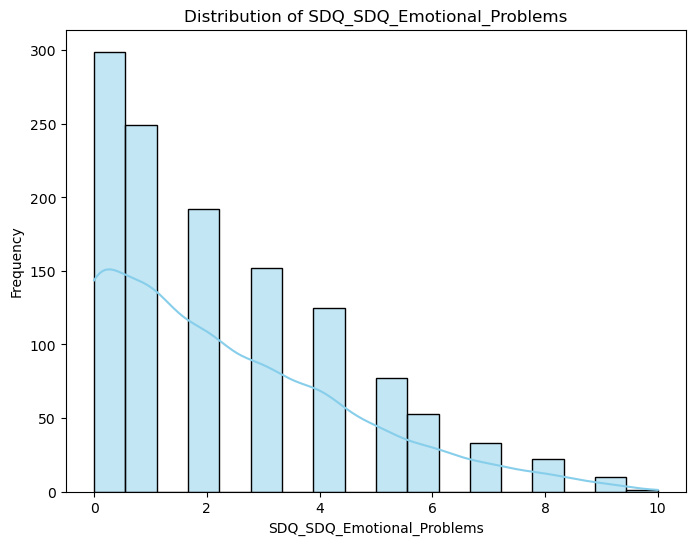

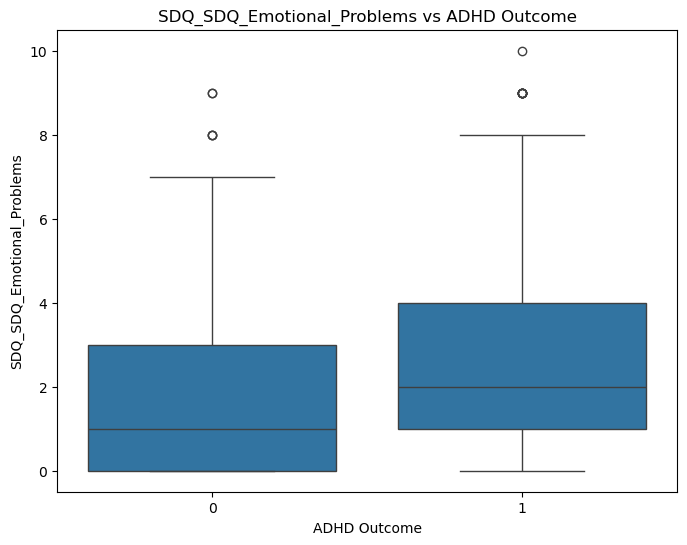

In [23]:
#Test Predictiveness
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

# Check for correlation with ADHD outcome
trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=trainQuant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

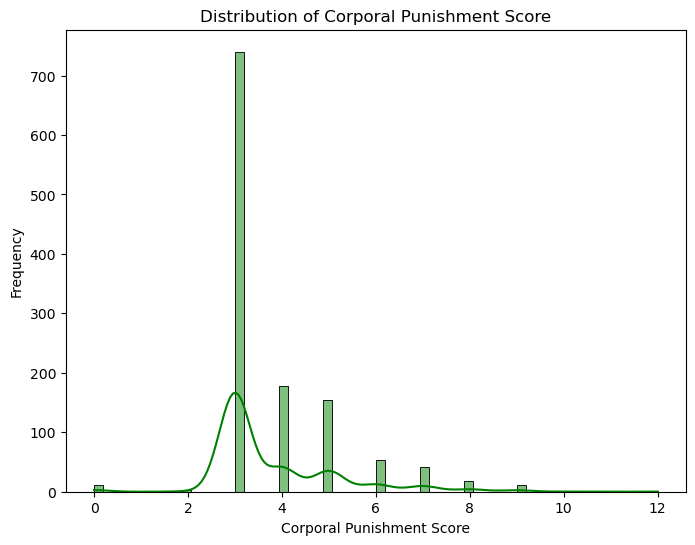

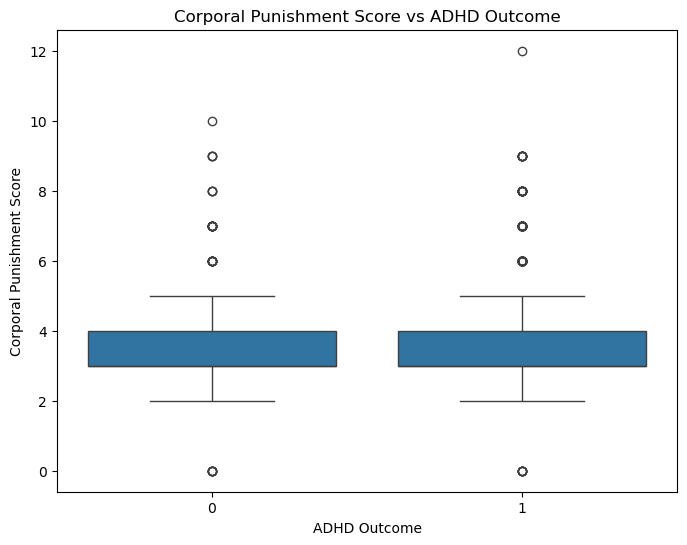

In [24]:


# Plot the distribution of the APQ_P_APQ_P_CP variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['APQ_P_APQ_P_CP'], kde=True, color='green')
plt.title('Distribution of Corporal Punishment Score')
plt.xlabel('Corporal Punishment Score')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='APQ_P_APQ_P_CP', data=trainQuant_copy)
plt.title('Corporal Punishment Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Corporal Punishment Score')
plt.show()


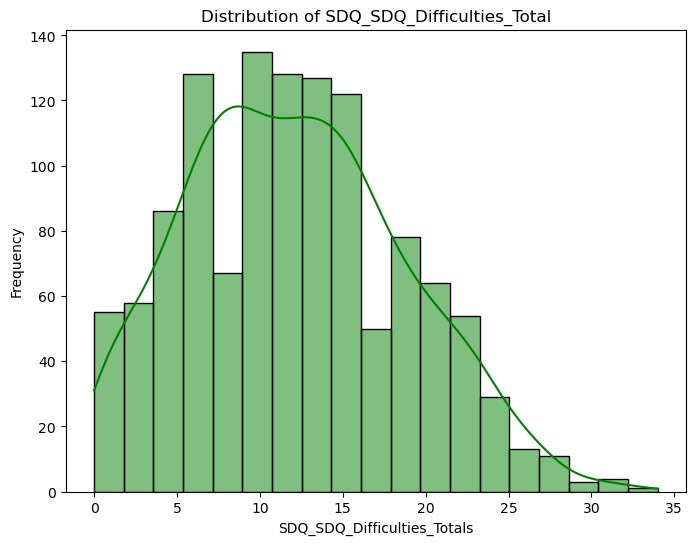

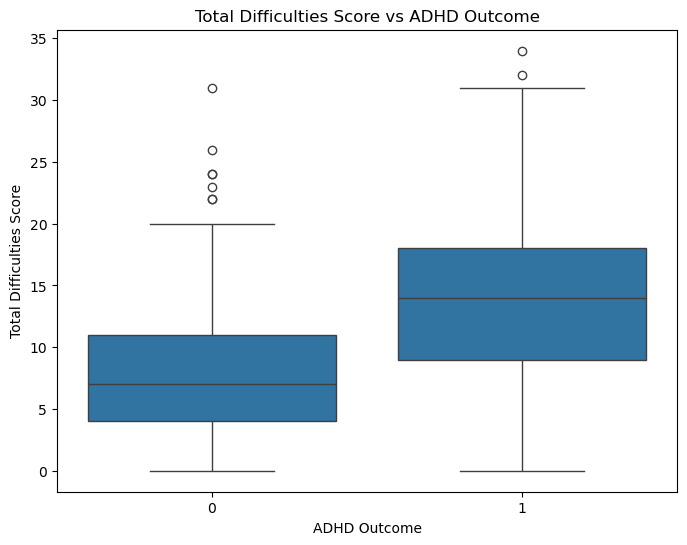

In [25]:
# Plot the distribution of the SDQ_SDQ_Difficulties_Total variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Difficulties_Total'], kde=True, color='green')
plt.title('Distribution of SDQ_SDQ_Difficulties_Total')
plt.xlabel('SDQ_SDQ_Difficulties_Totals')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Difficulties_Total', data=trainQuant_copy)
plt.title('Total Difficulties Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Difficulties Score')
plt.show()

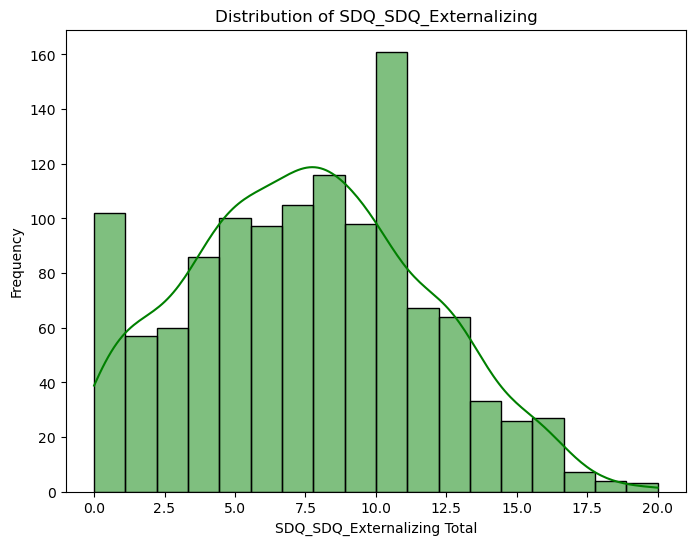

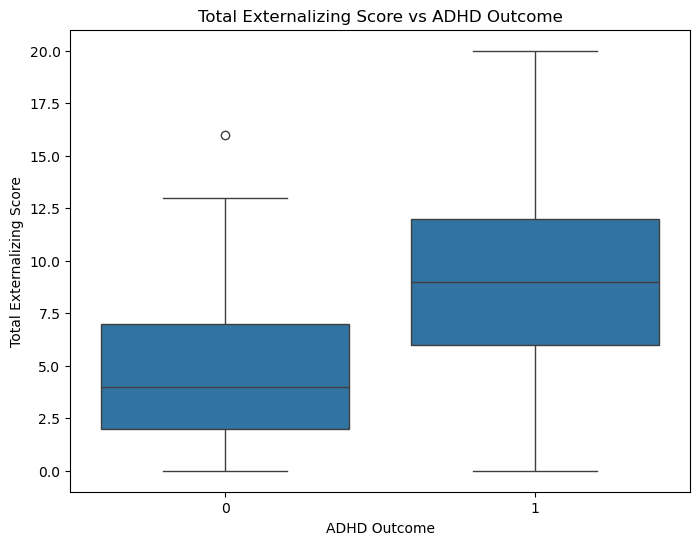

In [26]:
# Plot the distribution of the SDQ_SDQ_Externalizing variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Externalizing'], kde=True, color='green')
plt.title('Distribution of SDQ_SDQ_Externalizing')
plt.xlabel('SDQ_SDQ_Externalizing Total')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Externalizing', data=trainQuant_copy)
plt.title('Total Externalizing Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Externalizing Score')
plt.show()

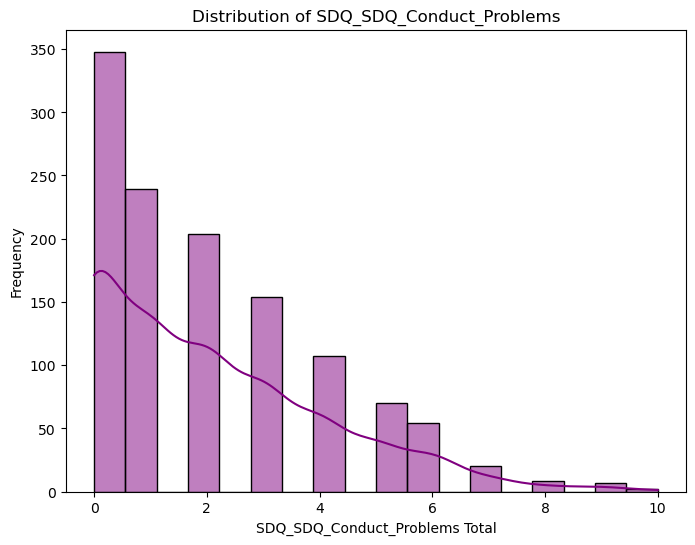

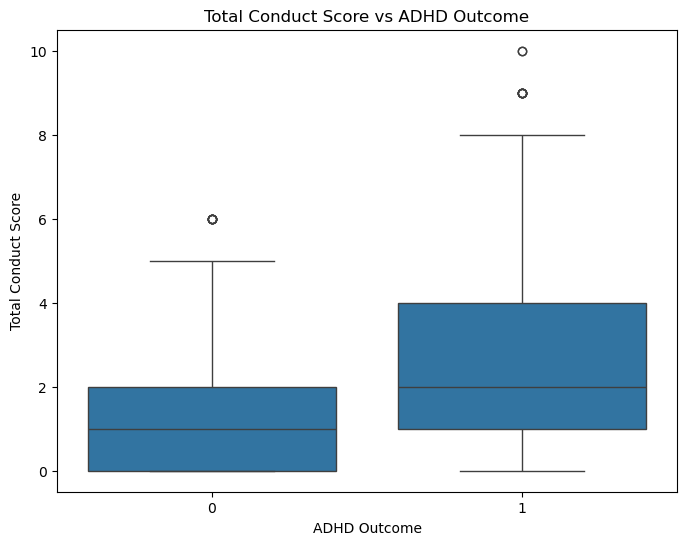

In [27]:
# Plot the distribution of the SDQ_SDQ_Conduct_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Conduct_Problems'], kde=True, color='purple')
plt.title('Distribution of SDQ_SDQ_Conduct_Problems')
plt.xlabel('SDQ_SDQ_Conduct_Problems Total')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Conduct_Problems', data=trainQuant_copy)
plt.title('Total Conduct Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Conduct Score')
plt.show()

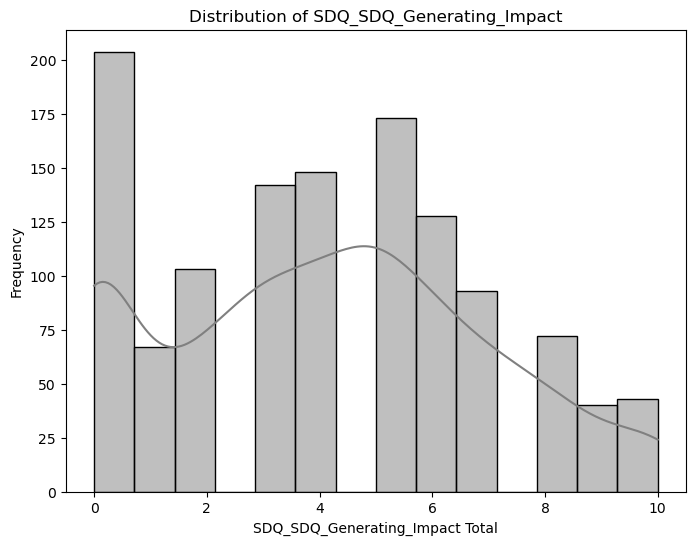

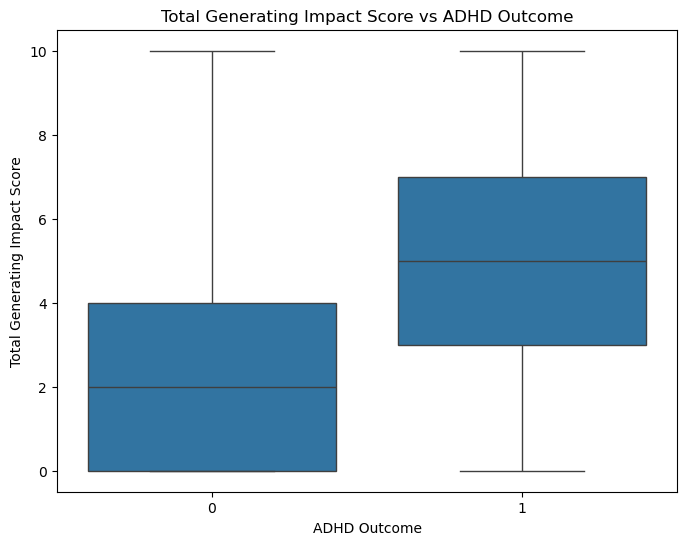

In [28]:
# Plot the distribution of the SDQ_SDQ_Generating_Impact variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Generating_Impact'], kde=True, color='grey')
plt.title('Distribution of SDQ_SDQ_Generating_Impact')
plt.xlabel('SDQ_SDQ_Generating_Impact Total')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Generating_Impact', data=trainQuant_copy)
plt.title('Total Generating Impact Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Generating Impact Score')
plt.show()

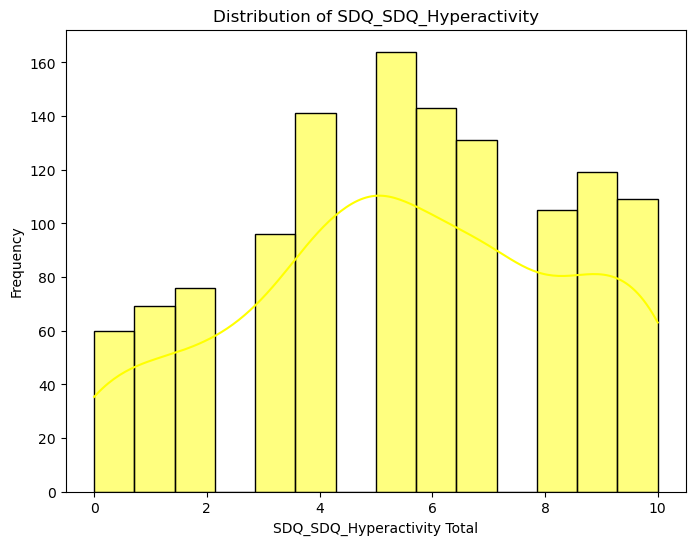

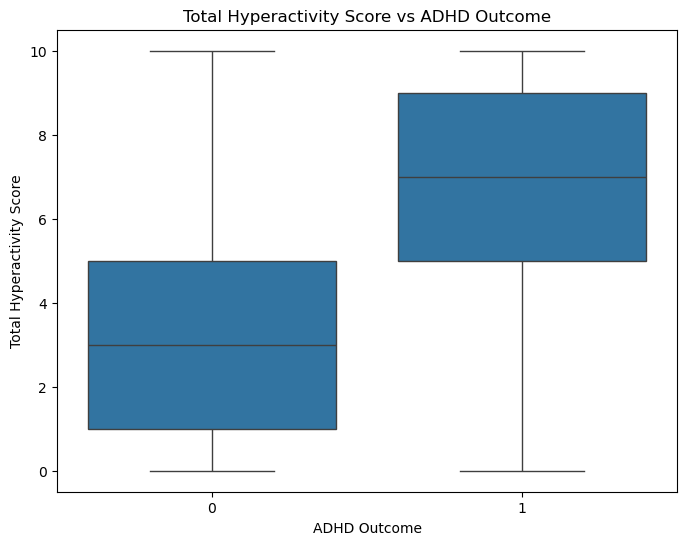

In [29]:
# Plot the distribution of the SDQ_SDQ_Hyperactivity variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Hyperactivity'], kde=True, color='yellow')
plt.title('Distribution of SDQ_SDQ_Hyperactivity')
plt.xlabel('SDQ_SDQ_Hyperactivity Total')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Hyperactivity', data=trainQuant_copy)
plt.title('Total Hyperactivity Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Hyperactivity Score')
plt.show()

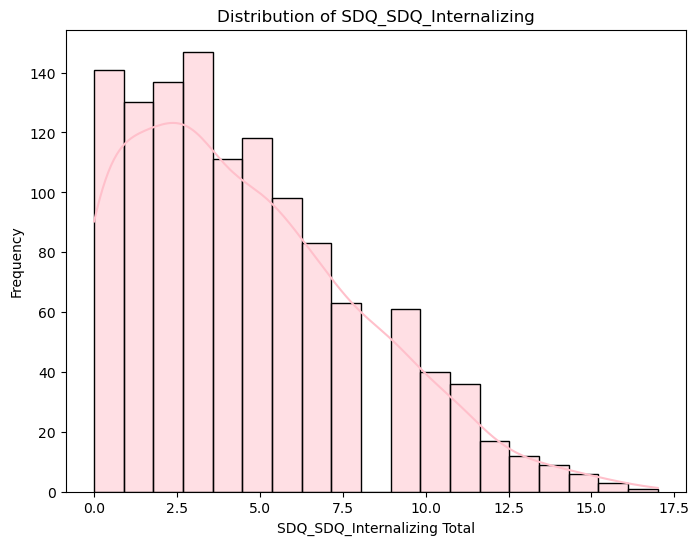

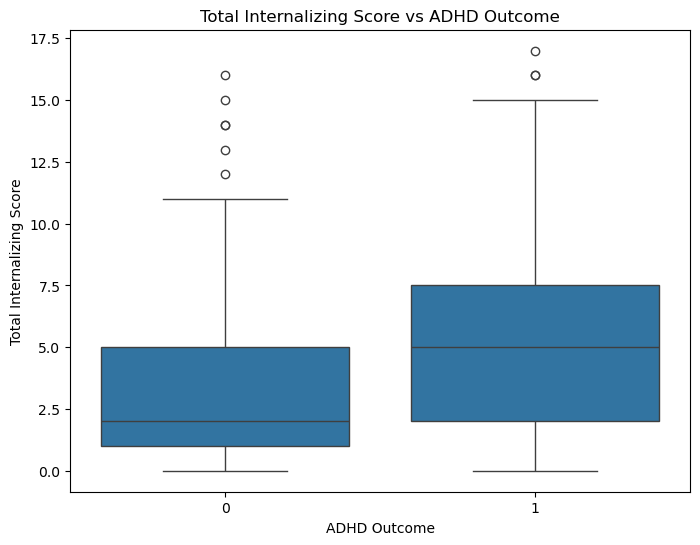

In [30]:
# Plot the distribution of the SDQ_SDQ_Internalizing variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Internalizing'], kde=True, color='pink')
plt.title('Distribution of SDQ_SDQ_Internalizing')
plt.xlabel('SDQ_SDQ_Internalizing Total')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Internalizing', data=trainQuant_copy)
plt.title('Total Internalizing Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Internalizing Score')
plt.show()

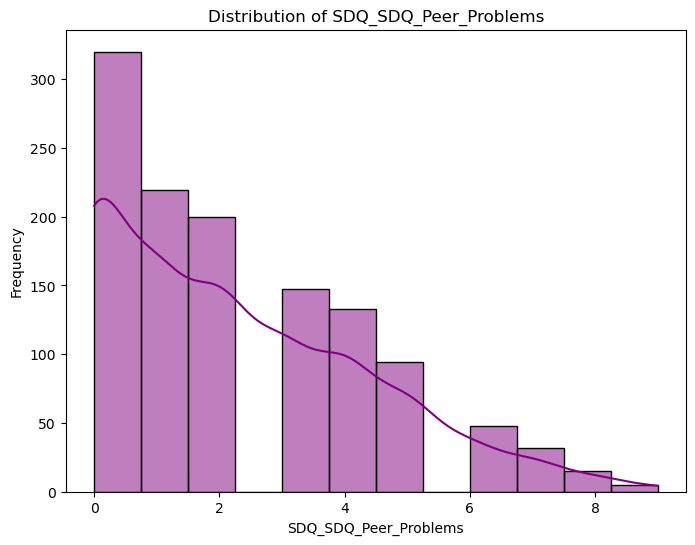

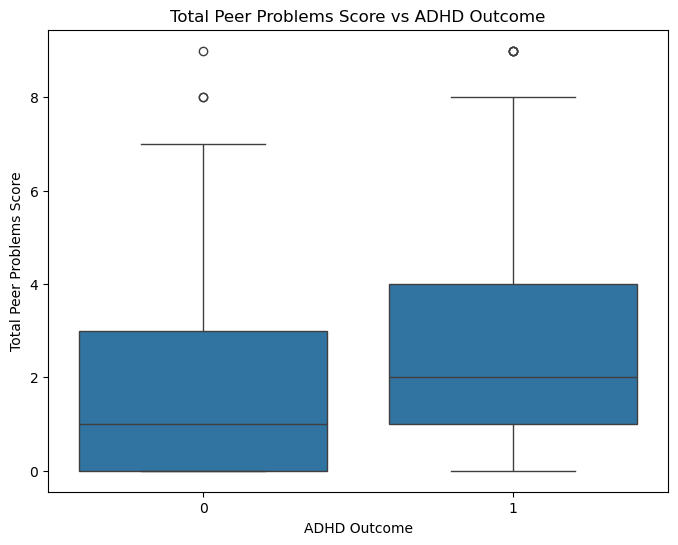

In [31]:
# Plot the distribution of the SDQ_SDQ_Peer_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Peer_Problems'], kde=True, color='purple')
plt.title('Distribution of SDQ_SDQ_Peer_Problems')
plt.xlabel('SDQ_SDQ_Peer_Problems')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Peer_Problems', data=trainQuant_copy)
plt.title('Total Peer Problems Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Peer Problems Score')
plt.show()

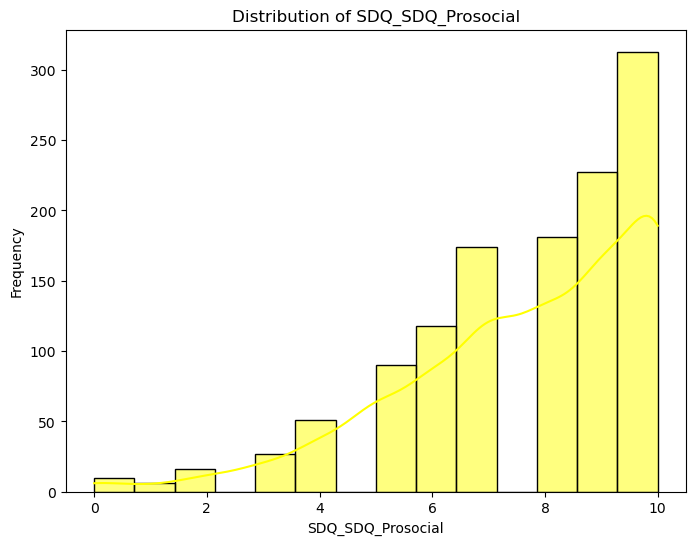

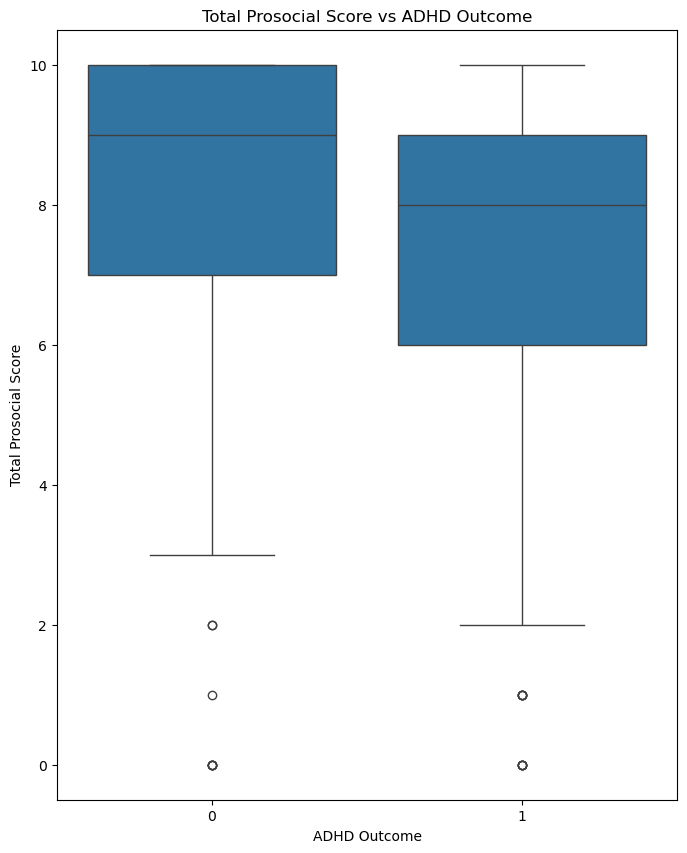

In [32]:
# Plot the distribution of the SDQ_SDQ_Prosocial variable
plt.figure(figsize=(8, 6))
sns.histplot(trainQuant['SDQ_SDQ_Prosocial'], kde=True, color='yellow')
plt.title('Distribution of SDQ_SDQ_Prosocial')
plt.xlabel('SDQ_SDQ_Prosocial')
plt.ylabel('Frequency')
plt.show()

trainQuant_copy = trainQuant.copy()
trainQuant_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

plt.figure(figsize=(8, 10))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Prosocial', data=trainQuant_copy)
plt.title('Total Prosocial Score vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('Total Prosocial Score')
plt.show()

In [33]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
trainCategorical_copy = trainCategorical.copy()
trainCategorical_copy['ADHD_Outcome'] = trainSol['ADHD_Outcome']

adhd_percentages = trainCategorical_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

#small sample size and unbalanced

Barratt_Barratt_P1_Edu
0     0.600000
3     0.800000
6     0.600000
9     0.678571
12    0.721649
15    0.672840
18    0.700713
21    0.672340
Name: ADHD_Outcome, dtype: float64


In [34]:
#convert integer columns to categorical columns 
for col in trainCategorical.select_dtypes(include='int').columns:
    trainCategorical[col] = trainCategorical[col].astype('category')

# List of columns except ppt ID
columns_to_encode = trainCategorical.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [35]:
# encoding categorical data
train_encoded = pd.get_dummies(trainCategorical[columns_to_encode], drop_first=True)
train_encoded = train_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

In [36]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([trainCategorical.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#load test categorical 
testCategorical = pd.read_excel('TEST_CATEGORICAL.xlsx')
testCategorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [38]:
# convert our int variables to categories
for col in testCategorical.select_dtypes(include='int').columns:
    testCategorical[col] = testCategorical[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(testCategorical[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([testCategorical.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

C:\Users\sandr\AppData\Local\Temp\ipykernel_35964\850197981.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Merge training dataframe 
trainCatFCM = pd.merge(cat_train_final, trainConnectome, on ='participant_id')
trainDF = pd.merge(trainCatFCM, trainQuant, on ='participant_id')
trainDF.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679


In [40]:
#Read in testing dataframe
testConnectome = pd.read_csv('TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
testConnectome.head()

testQuant =pd.read_excel('TEST_QUANTITATIVE_METADATA.xlsx')
testQuant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [41]:
#Merge testing datafraame 
testCatConnect = pd.merge(testConnectome, cat_test_final,  on ='participant_id')
testDF = pd.merge(testQuant, testCatConnect, on ='participant_id')
testDF.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Check for NA values 
print(trainDF.isna().sum())
#11 NA in ethnicity
#360 in MRI track age

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity     11
Basic_Demos_Enroll_Year_2016          0
Basic_Demos_Enroll_Year_2017          0
Basic_Demos_Enroll_Year_2018          0
                                   ... 
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Length: 19973, dtype: int64


In [43]:
#fill with averages
trainDF.fillna({'MRI_Track_Age_at_Scan':trainDF['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
trainDF.fillna({'PreInt_Demos_Fam_Child_Ethnicity':trainDF['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(trainDF.isna().sum().sum()) # should now be zero

0


In [44]:
#Check for NA values in test 
print(testDF.isna().sum())
#30 in hyperactivity 
#30 in internalizing 
#30 in peer problems
#30 in prosocial 

participant_id                0
EHQ_EHQ_Total                 1
ColorVision_CV_Score          9
APQ_P_APQ_P_CP               15
APQ_P_APQ_P_ID               15
                             ..
Barratt_Barratt_P2_Occ_25     0
Barratt_Barratt_P2_Occ_30     0
Barratt_Barratt_P2_Occ_35     0
Barratt_Barratt_P2_Occ_40     0
Barratt_Barratt_P2_Occ_45     0
Length: 19973, dtype: int64


In [45]:
#fill NA in test
for col in testDF.columns:
    if testDF[col].isna().sum() > 0:  # Check if the column has NaN values
        if testDF[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            testDF[col] = testDF[col].fillna(testDF[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [46]:
X_train = trainDF.drop(columns = ['participant_id'])
Y_train = trainSol.drop(columns = ['participant_id'])

In [58]:
participant_id = testDF['participant_id']

X_test = testDF.drop(columns = 'participant_id')


In [59]:
#Build ML model - try xgboost first 
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier


In [60]:
#initialize base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [61]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [62]:
# Train the model
multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))

In [63]:
participant_id = testDF['participant_id']

X_train.head()

,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Race_1,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,0.0,1,0,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,11.245678
1,1.0,0,0,0,1,0,0,1,0,0,...,0,18,6,8,7,8,10,4,5,11.245678
2,1.0,1,0,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,0.0,0,0,1,0,0,0,1,0,0,...,6,24,4,16,9,10,8,4,6,11.245678
4,0.0,0,0,0,1,0,0,1,0,1,...,1,18,4,11,4,10,7,3,9,8.940679


In [64]:
X_test.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,...,0,0,0,0,0,0,0,0,0,0
1,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,...,0,0,0,0,0,0,0,0,0,0
2,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,...,0,0,0,0,0,0,0,0,0,0
4,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Get the feature names from the trained model
expected_features = multioutput_classifier.estimators_[0].get_booster().feature_names

In [66]:
# Reorder X_test to match the expected order
X_test = X_test[expected_features]

In [67]:

# Now make predictions
participant_id = testDF['participant_id']
y_pred = multioutput_classifier.predict(X_test)

In [68]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 1               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 1               0
300   IUEHiLmQAqCi                 1               0
301   cRySmCadYFRO                 1               1
302   E3MvDUtJadc5                 1               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


In [69]:
#check cv score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [70]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

In [71]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [72]:
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

#model is not optimal - next step is feature selection 

Cross-validation scores for each fold: [0.82716049 0.79012346 0.7037037  0.65495868 0.32438017]
Mean CV score: 0.6600652994592389


In [73]:
#feature selection 
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(trainDF.drop(columns='participant_id'), trainSol['Sex_F'])

C:\Users\sandr\d\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [75]:
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=trainDF.drop(columns='participant_id').columns)

In [76]:
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

52throw_53thcolumn           0.446637
50throw_53thcolumn           0.442523
121throw_147thcolumn         0.428787
101throw_131thcolumn         0.428291
164throw_189thcolumn         0.427107
114throw_121thcolumn         0.423465
53throw_55thcolumn           0.423317
Barratt_Barratt_P1_Edu_9     0.408212
160throw_190thcolumn         0.404462
MRI_Track_Scan_Location_4    0.401153
dtype: float64


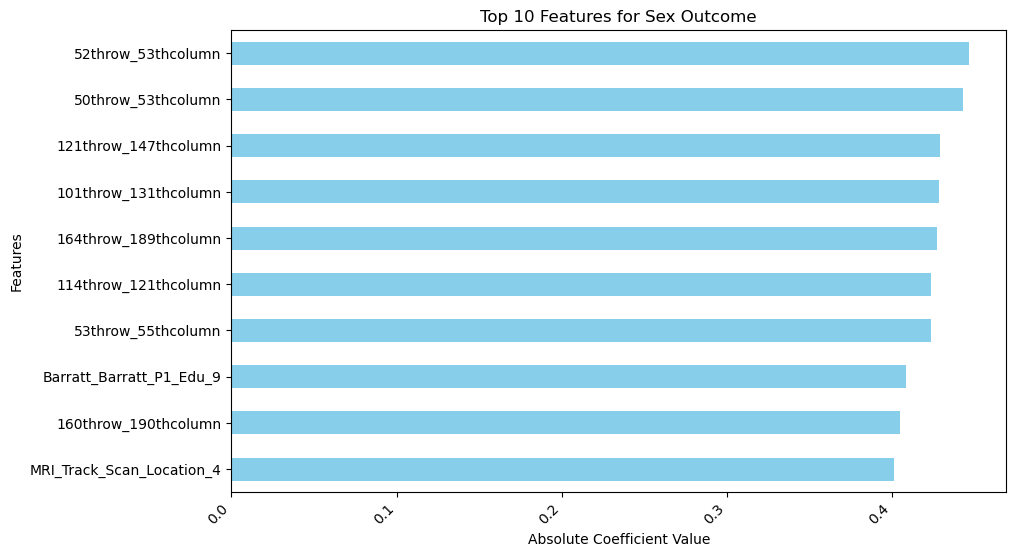

In [77]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [78]:
#feature selection for ADHD outcome
model = LogisticRegression(max_iter=1000)
model.fit(trainDF.drop(columns='participant_id'), trainSol['ADHD_Outcome'])

C:\Users\sandr\d\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [79]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=trainDF.drop(columns='participant_id').columns)

In [80]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

Basic_Demos_Enroll_Year_2016     0.809186
Barratt_Barratt_P1_Occ_25        0.516881
SDQ_SDQ_Hyperactivity            0.481530
Basic_Demos_Enroll_Year_2018     0.475478
Basic_Demos_Enroll_Year_2017     0.437091
MRI_Track_Scan_Location_3        0.427648
Barratt_Barratt_P1_Occ_35        0.418338
8throw_96thcolumn                0.414787
PreInt_Demos_Fam_Child_Race_8    0.397561
MRI_Track_Scan_Location_1        0.393947
dtype: float64


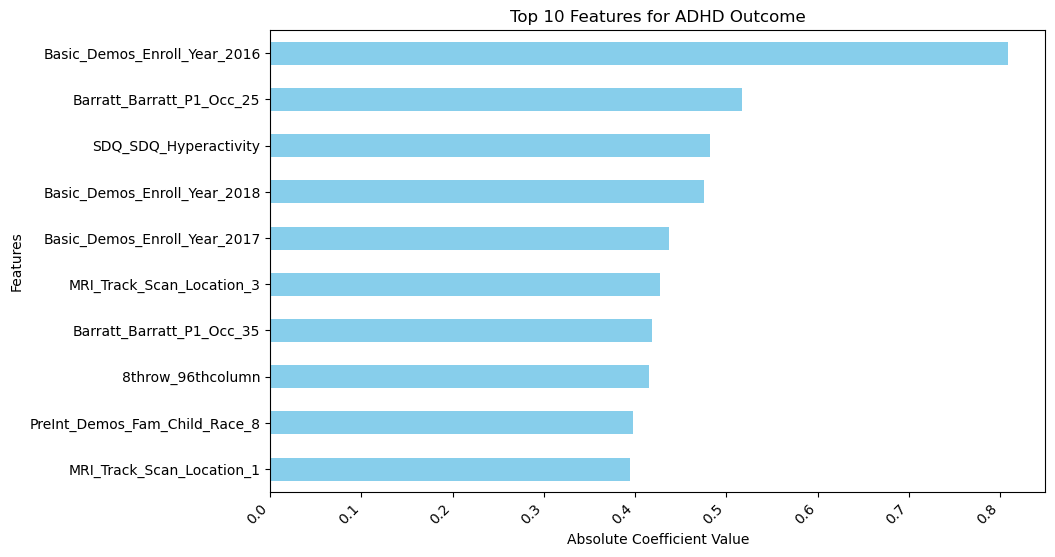

In [81]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [82]:
#use L1 regularization for sex as the target
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(trainDF.drop(columns='participant_id'), trainSol['Sex_F'])

LogisticRegression(penalty='l1', solver='liblinear')

In [83]:
selected_features_Sex = trainDF.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2017',
       'Basic_Demos_Enroll_Year_2019', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_2', 'PreInt_Demos_Fam_Child_Race_9',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_3',
       ...
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=413)


In [84]:
#L1 regularization with ADHD_Outcome as target
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(trainDF.drop(columns='participant_id'), trainSol['ADHD_Outcome'])

LogisticRegression(penalty='l1', solver='liblinear')

In [85]:
selected_features_ADHD = trainDF.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2016',
       'Basic_Demos_Enroll_Year_2017', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_2', 'PreInt_Demos_Fam_Child_Race_8',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_3',
       ...
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=265)


In [86]:
# Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))

In [87]:
X_train_2 = X_train[common_features]
X_test_2 = X_test[common_features]

In [88]:
# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [89]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [90]:
# Train the model
multioutput_classifier.fit(X_train_2, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))

In [91]:
y_pred_2 = multioutput_classifier.predict(X_test_2)

In [92]:
# Convert predictions to a DataFrame
predictions_df_2 = pd.DataFrame(
    y_pred_2,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_2 = pd.concat([participant_id.reset_index(drop=True), predictions_df_2], axis=1)

result_df_2.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [93]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [94]:
# Perform cross-validation on the training data
cv_scores_2 = cross_val_score(multioutput_classifier, X_train_2, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_2)
print("Mean CV score:", np.mean(cv_scores_2))


Cross-validation scores for each fold: [0.77983539 0.7654321  0.70164609 0.65082645 0.43801653]
Mean CV score: 0.667151311090705
